# Getting started with futureEXPERT

This section shows the most simple approach to create forecasts of your time series in Python.

If you want to review interim results, have a look at the [stepwise execution in the advanced examples](advanced_workflow.ipynb).


## Login and expert client
futureEXPERT needs credentials to authenticate you. So, to log in, you need to create an authenticated client which handles all interactions with the _future_ platform.

If you do not yet have an account for the _future_ platform, you can apply for a trial account [here](https://www.prognostica.de/de/future.html#future-testen).

Additionally, if you are not subscribed for futureEXPERT, please contact us at support@future.prognostica.de

In [7]:
from futureexpert import ExpertClient

# You can provide your credentials from an .env file (see .env.example)
import dotenv
dotenv.load_dotenv()

# Log in using your credentials or alternatively provide FUTURE_USER and FUTURE_PW via environment variables or .env file
client = ExpertClient(user='', password='')

INFO:futureexpert.expert_client:Successfully logged in for group group-expert.


## Check in your time series

Check in your time series for futureEXPERT in the _future_ frontend https://future.prognostica.de:

1. Navigate to 'My Data' and upload your data
2. Start the futureCHECK-IN process from a file.
3. Follow along the futureCHECK-IN steps in the frontend.
4. Copy the version ID.


![copy version from CHECK-IN](img/futureEXPERT_1.png "CHECK-IN")

You can then use your checked-in data for forecasting in futureEXPERT.

For further ways to check in your data (e.g. over Python) got to [CHECK-IN configurations](checkin_configuration_options.ipynb).

## Configure your forecast settings

For an overview of all settings and explanation check the [API documentation](https://discovertomorrow.github.io/futureEXPERT).


In [8]:
from futureexpert import *

fc_report_config = ReportConfig(title='My first report',
                                forecasting=ForecastingConfig(fc_horizon=7,
                                                              lower_bound=0,
                                                              confidence_level=0.8),
                                preprocessing=PreprocessingConfig(use_season_detection=True,
                                                                  detect_outliers=False,
                                                                  replace_outliers=False,
                                                                  ),
                                method_selection=MethodSelectionConfig(number_iterations=8))

## Invoke forecast computation

Computing the forecasting results takes some time depending on the number of time series and the configuration. The computation of the results is therefore an asynchoronous operation which does not block your Python environment. Let's watch the status of the forecast computation before accessing the results.

In [3]:
import os
ts_version = 'TBD' # replace with your version

# Request forecast creation and retrieve the id for status requests and result retrieval
forecast_identifier = client.start_forecast(version=ts_version, config=fc_report_config)

INFO:futureexpert.expert_client:Preparing data for forecast...
INFO:futureexpert.expert_client:Finished data preparation for forecast.
INFO:futureexpert.expert_client:Started creating forecasting report with futureFORECAST...
INFO:futureexpert.expert_client:Finished report creation. Forecasts are running...


In [4]:
import time

# Watch the current status of the forecasting report
while not (current_status := client.get_report_status(id=forecast_identifier)).is_finished:
    current_status.print()
    print('Waiting another 30 seconds to finish forecasting...')
    time.sleep(30)  # Wait between status requests

current_status.print()

# Retrieve the final results
results = client.get_fc_results(id=forecast_identifier, include_backtesting=True, include_k_best_models=2)

Status forecasting report for id: report_id=11243 settings_id=11247
 0 % are finished 
 1 time series requested for calculation 
 0 time series finished 
 0 time series no evaluation 
 0 time series ran into an error
Waiting another 30 seconds to finish forecasting...
Status forecasting report for id: report_id=11243 settings_id=11247
 0 % are finished 
 1 time series requested for calculation 
 0 time series finished 
 0 time series no evaluation 
 0 time series ran into an error
Waiting another 30 seconds to finish forecasting...
Status forecasting report for id: report_id=11243 settings_id=11247
 0 % are finished 
 1 time series requested for calculation 
 0 time series finished 
 0 time series no evaluation 
 0 time series ran into an error
Waiting another 30 seconds to finish forecasting...
Status forecasting report for id: report_id=11243 settings_id=11247
 0 % are finished 
 1 time series requested for calculation 
 0 time series finished 
 0 time series no evaluation 
 0 time s

## Visualize results

The futureEXPERT client offers tools to plot the forecast results, including prediction intervals (if available) and backtesting iterations.

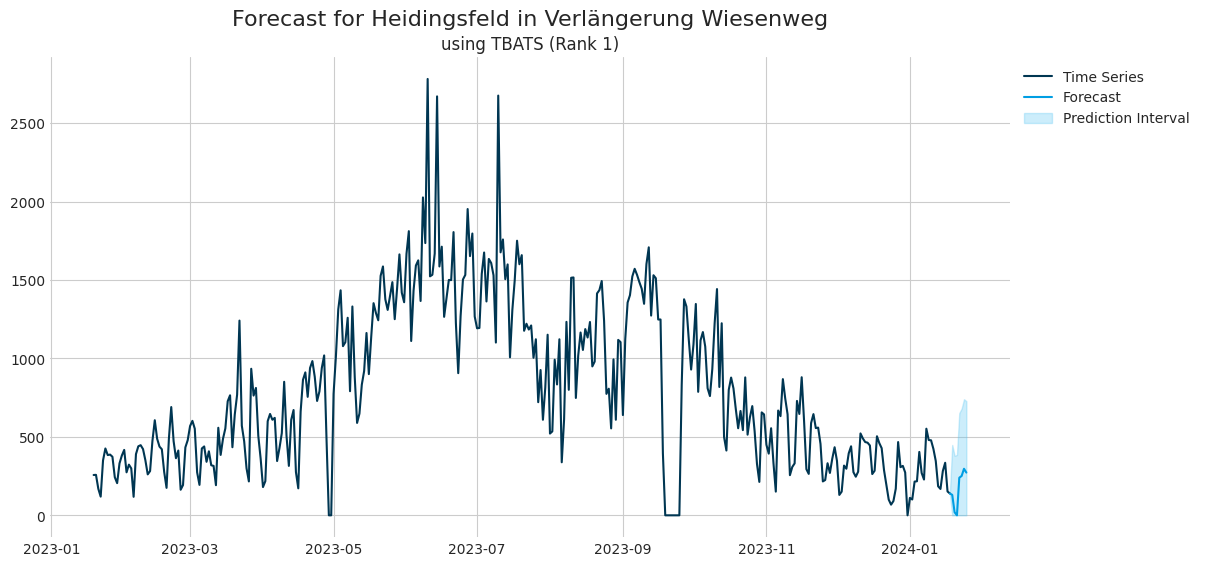

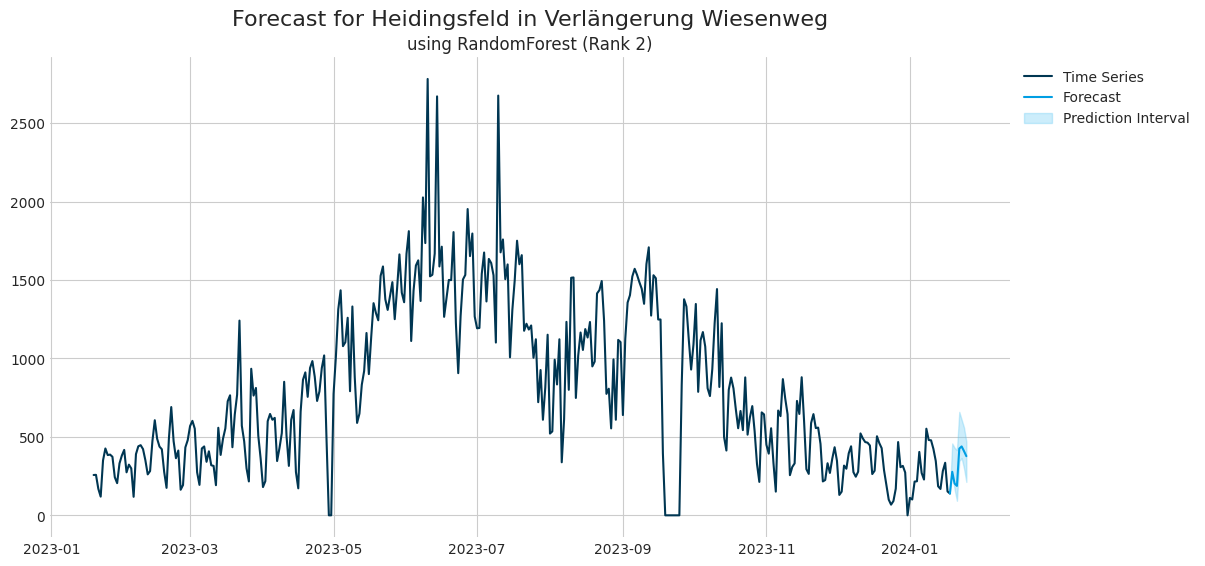

In [7]:
from futureexpert import plot

forecasts = results[0]
plot.plot_forecast(forecasts, plot_last_x_data_points_only=365, ranks=[1,2])

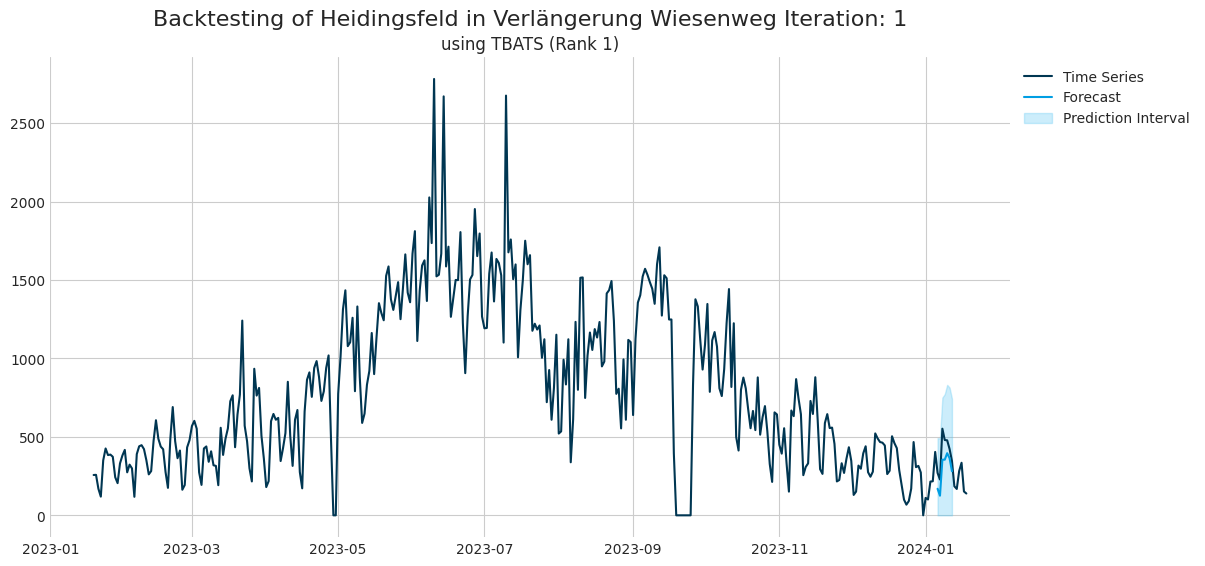

In [11]:
from futureexpert import plot

forecasts = results[0]
plot.plot_backtesting(forecasts, iteration=1, plot_last_x_data_points_only=365)